In [1]:
import pandas as pd
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')
tips.head(2)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3

1. 컬럼의 이름변경 -> [총 금액, 팁, 성별, 흡연 여부, 요일, 시간, 인원]
2. 총 금액, 팁 컬럼의 데이터를 소수점 첫째 자리까지 유지 하고 반올림
3. 식사 인원, 성별에 따라(그룹화) 팁의 비율의 평균 값을 구하고 시각화(바형 그래프)

In [7]:
tips.columns = ['총 금액', '팁', '성별', '흡연 여부', '요일', '시간', '인원']
tips.head(1)

총 금액     팁      성별 흡연 여부   요일      시간  인원
0  16.99  1.01  Female    No  Sun  Dinner   2

In [ ]:
round(tips['총 금액'], 1)

In [11]:
tips[['총 금액', '팁']] = tips[['총 금액', '팁']].round(1)

In [ ]:
tips.head(2)

In [14]:
# 팁 비율  = (팁 / 총 금액) * 100
tips['팁 비율'] = (tips['팁'] / tips['총 금액']) * 100

In [17]:
tips.head(2)

총 금액    팁      성별 흡연 여부   요일      시간  인원       팁 비율
0  17.0  1.0  Female    No  Sun  Dinner   2   5.882353
1  10.3  1.7    Male    No  Sun  Dinner   3  16.504854

In [19]:
group_data = tips.groupby(['인원', '성별']).mean()['팁 비율']

C:\Users\ezen\AppData\Local\Temp\ipykernel_9016\2528622873.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_data = tips.groupby(['인원', '성별']).mean()['팁 비율']


<AxesSubplot: ylabel='인원,성별'>

C:\Users\ezen\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  func(*args, **kwargs)
C:\Users\ezen\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\ezen\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\ezen\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
C:\Users\ezen\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ezen\AppData\Ro

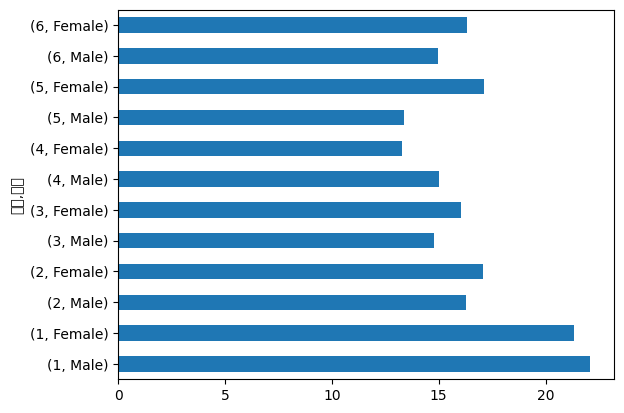

In [20]:
group_data.plot.barh()

In [21]:
import matplotlib.pyplot as plt

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


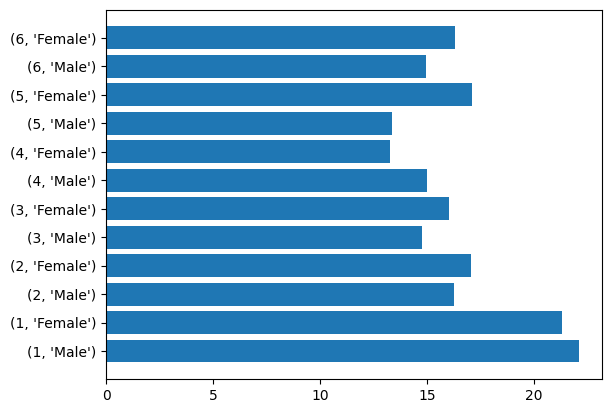

In [26]:
x = group_data.index
list_x = list(range(0, len(x), 1))
y = group_data.values
print(list_x)
plt.barh(list_x, y)
plt.yticks(list_x, x)
plt.show()

In [ ]:
group_data = tips.groupby(['인원', '성별']).mean()[['팁 비율']]
group_data

1. 남자의 팁 비율 데이터프레임 생성
2. 여자의 팁 지율 데이터프레임 생성
3. 2개의 데이터프레임을 시각화

In [ ]:
###hint 
group_data.index

# 멀티 인덱스에 성별 부분만 출력
for i in group_data.index:
    print(i[1])


In [43]:
sample = tips.set_index(['총 금액', '성별'])
sample.loc[(10.3,'Male'),:]


C:\Users\ezen\AppData\Local\Temp\ipykernel_9016\1617935924.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  sample.loc[(10.3,'Male'),:]


팁 흡연 여부    요일      시간  인원       팁 비율
총 금액 성별                                          
10.3 Male  1.7    No   Sun  Dinner   3  16.504854
     Male  1.7    No   Sun  Dinner   2  16.504854
     Male  2.0   Yes  Thur   Lunch   2  19.417476

In [66]:
## step1 : 비어있는 데이터프레임 생성
male_data = pd.DataFrame()
female_data = pd.DataFrame()

## step2 : for문을 이용하여 male인 경우 1을 출력 female인 경우 2을 출력
for i in group_data.index:
    data = group_data.loc[[i]]
    if i[1] == 'Male':
        male_data = pd.concat([male_data, data])
    else:
        female_data = pd.concat([female_data, data])

print(male_data)
print(female_data)


              팁 비율
인원 성별             
1  Male  22.093023
2  Male  16.273796
3  Male  14.763093
4  Male  15.017047
5  Male  13.371547
6  Male  14.953486
                팁 비율
인원 성별               
1  Female  21.322912
2  Female  17.053626
3  Female  16.025679
4  Female  13.267871
5  Female  17.114094
6  Female  16.306239


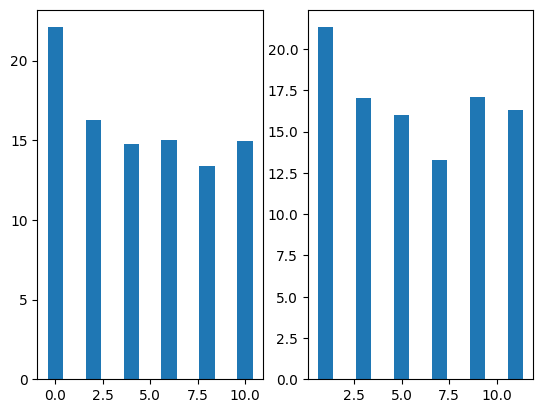

In [74]:
x1 = range(0, len(male_data.index)*2, 2)
x2 = range(1, len(female_data.index)*2, 2)
y1 = male_data['팁 비율']
y2 = female_data['팁 비율']

plt.subplot(1, 2, 1)
plt.bar(x1, y1)
plt.subplot(1, 2, 2)
plt.bar(x2, y2)
plt.show()

In [75]:
plt.bar(x1, y1)
plt.bar(x2, y2)
plt.show()

In [49]:

## step3 : for문에서 male인 경우 해당하는 인덱스의 데이터를 출력
## loc[인덱스 비교, 컬럼 비교]
## iloc[인덱스의 위치 비교, 컬럼의 위치 비교]
group_data.loc[(1, 'Male')]


## step4 : for문에서 male, female인 경우 비어있는 데이터프레임에서 행 추가



팁 비율    22.093023
Name: (1, Male), dtype: float64

In [50]:
group_data.index

MultiIndex([(1,   'Male'),
            (1, 'Female'),
            (2,   'Male'),
            (2, 'Female'),
            (3,   'Male'),
            (3, 'Female'),
            (4,   'Male'),
            (4, 'Female'),
            (5,   'Male'),
            (5, 'Female'),
            (6,   'Male'),
            (6, 'Female')],
           names=['인원', '성별'])

In [63]:
test_df = pd.DataFrame()
test2_df = pd.DataFrame()

for i in tips.index:
    if i % 10 == 0: 
        test_df = pd.concat([test_df, tips.loc[[i]]])
    if i % 50 == 0:
        test2_df = pd.concat([test2_df, tips.loc[[i]]])

test2_df

총 금액    팁      성별 흡연 여부    요일      시간  인원       팁 비율
0    17.0  1.0  Female    No   Sun  Dinner   2   5.882353
50   12.5  2.5    Male    No   Sun  Dinner   2  20.000000
100  11.4  2.5  Female   Yes   Fri  Dinner   2  21.929825
150  14.1  2.5    Male    No   Sun  Dinner   2  17.730496
200  18.7  4.0    Male   Yes  Thur   Lunch   3  21.390374

In [59]:
tips.loc[[10]]

총 금액    팁    성별 흡연 여부   요일      시간  인원       팁 비율
10  10.3  1.7  Male    No  Sun  Dinner   2  16.504854

In [70]:
a = [0,1,2,3,4,5]
a*2

[0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5]

In [77]:
list(range(0, 6, 1))

[0, 2, 4]

In [73]:
list(range(0, 12, 2))

[0, 2, 4, 6, 8, 10]

### pivot_table
1. 그룹화
2. 행 인덱스 
3. 형 인덱스
4. 데이터 값
5. 데이터의 집계

In [79]:
titanic = sns.load_dataset('titanic')\
    [['age', 'sex', 'class', 'fare', 'survived']]
titanic.head(1)

age   sex  class  fare  survived
0  22.0  male  Third  7.25         0

In [80]:
pd.pivot_table(
    titanic,            ## 기준이 되는 데이터프레임
    index = 'class',    ## 등급별로 그룹화
    columns = 'sex',    ## 성별로 분할
    values = 'age',     ## 그룹화된 데이터들의 나이를 선택
    aggfunc= 'mean'     ## 나이의 평균
)

sex        female       male
class                       
First   34.611765  41.281386
Second  28.722973  30.740707
Third   21.750000  26.507589

In [82]:
### 클래스별 성별 생존자의 수를 출력

## groupby
titanic.groupby(['class', 'sex']).sum()['survived']
## pivot_table
pd.pivot_table(
    titanic, 
    index = 'class', 
    columns= 'sex', 
    values= 'survived', 
    aggfunc= 'sum'
)

sex     female  male
class               
First       91    45
Second      70    17
Third       72    47

In [83]:
pd.pivot_table(
    titanic, 
    index = ['class', 'sex'], 
    values= 'survived', 
    aggfunc= 'sum'
)

survived
class  sex             
First  female        91
       male          45
Second female        70
       male          17
Third  female        72
       male          47

In [84]:
## 자리등급과 성별에 따라
## 생존자와 사망자의 
## 나이의 평균

pd.pivot_table(
    titanic, 
    index = ['class', 'sex'], 
    columns='survived', 
    values='age', 
    aggfunc='mean'
)

survived               0          1
class  sex                         
First  female  25.666667  34.939024
       male    44.581967  36.248000
Second female  36.000000  28.080882
       male    33.369048  16.022000
Third  female  23.818182  19.329787
       male    27.255814  22.274211